# Credit Card Fraud

We will be detecting credit card fraud based on the different features of our dataset with 3 different models. Here is the Logistic Regression one.

We're looking to minimize the False Negative Rate or FNR.

Since the dataset is unbalanced, we can try two techniques that may help us have better predictions:

    - Adding some noise (gaussian) to the fraud data to create more and reduce the imbalance
    - Randomly sample the fraud data and train k models and average them out (or choose the best)
    
 

In [27]:
import numpy as np
import sklearn as sk
import pandas as pd
import matplotlib.pyplot as plt
#from pandas_ml import ConfusionMatrix
#import pandas_ml as pdml
from sklearn.preprocessing import scale
import random

In [10]:
# May have to do this...
!pip install imblearn
!pip install --upgrade sklearn

In [11]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [12]:
df = pd.read_csv('creditcard.csv', low_memory=False)
df = df.sample(frac=1).reset_index(drop=True)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,35021.0,-2.970155,-4.105959,1.234005,-1.848195,-2.120954,0.695454,0.928433,0.339468,-2.212104,...,0.482444,-0.107868,1.949117,-0.487903,0.520586,-0.273228,-0.005183,0.201806,810.62,0
1,121418.0,-0.189587,-1.549061,-0.090465,-0.978752,0.074513,0.481909,-1.111084,0.083959,-2.143394,...,-0.098772,0.257412,-0.016174,-0.339887,-1.207500,0.122592,0.312283,0.201474,105.89,0
2,38361.0,-0.429674,1.146632,2.526917,3.090515,-0.413567,0.551029,0.002340,0.289450,-0.789619,...,0.206549,1.001102,-0.101634,0.657273,-0.412748,0.341478,0.458540,0.223968,3.40,0
3,167844.0,-1.159398,-0.317536,0.367101,-0.400824,1.380710,-1.395277,1.242776,-0.729063,0.492451,...,-0.546816,-0.325125,0.950323,-0.004205,-0.226108,0.132726,0.167090,-0.440067,8.99,0
4,65424.0,-0.386760,0.961545,1.228724,0.029079,0.057517,-0.546950,0.533228,0.157871,-0.150420,...,-0.254024,-0.709723,0.039226,-0.022596,-0.288468,0.107019,0.250679,0.091435,5.55,0


In [13]:
frauds = df.loc[df['Class'] == 1]
non_frauds = df.loc[df['Class'] == 0]
print("We have", len(frauds), "fraud data points and", len(non_frauds), "nonfraudulent data points.")

We have 492 fraud data points and 284315 nonfraudulent data points.


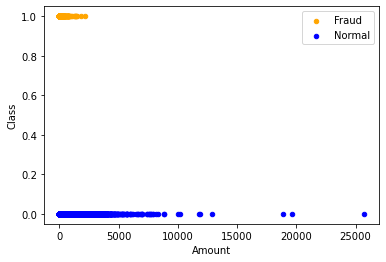

This feature looks important based on their distribution with respect to class.
We will now zoom in onto the fraud data to see the ranges of amount just for fun.


In [14]:
ax = frauds.plot.scatter(x='Amount', y='Class', color='Orange', label='Fraud')
non_frauds.plot.scatter(x='Amount', y='Class', color='Blue', label='Normal', ax=ax)
plt.show()
print("This feature looks important based on their distribution with respect to class.")
print("We will now zoom in onto the fraud data to see the ranges of amount just for fun.")

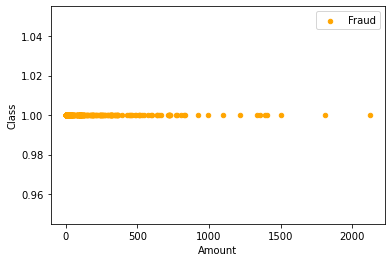

In [15]:
bx = frauds.plot.scatter(x='Amount', y='Class', color='Orange', label='Fraud')
plt.show()

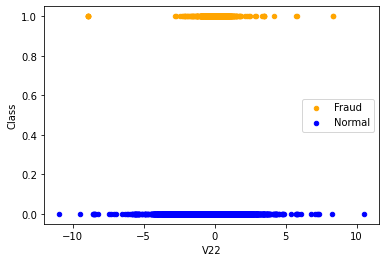

This feature may not be very important because of the similar distribution.


In [16]:
ax = frauds.plot.scatter(x='V22', y='Class', color='Orange', label='Fraud')
non_frauds.plot.scatter(x='V22', y='Class', color='Blue', label='Normal', ax=ax)
plt.show()
print("This feature may not be very important because of the similar distribution.")

# Logistic Regression (vanilla)

In [17]:
from sklearn import datasets, linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

In [18]:
X = df.iloc[:,:-1]
y = df['Class']

print("X and y sizes, respectively:", len(X), len(y))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35)
print("Train and test sizes, respectively:", len(X_train), len(y_train), "|", len(X_test), len(y_test))
print("Total number of frauds:", len(y.loc[df['Class'] == 1]), len(y.loc[df['Class'] == 1])/len(y))
print("Number of frauds on y_test:", len(y_test.loc[df['Class'] == 1]), len(y_test.loc[df['Class'] == 1]) / len(y_test))
print("Number of frauds on y_train:", len(y_train.loc[df['Class'] == 1]), len(y_train.loc[df['Class'] == 1])/len(y_train))

X and y sizes, respectively: 284807 284807
Train and test sizes, respectively: 185124 185124 | 99683 99683
Total number of frauds: 492 0.001727485630620034
Number of frauds on y_test: 174 0.0017455333406899874
Number of frauds on y_train: 318 0.0017177675503986518


In [19]:
logistic = linear_model.LogisticRegression(C=1e5)
logistic.fit(X_train, y_train)
print("Score: ", logistic.score(X_test, y_test))

Score:  0.998735993098121


/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [20]:
y_predicted = np.array(logistic.predict(X_test))
y_right = np.array(y_test)

# Logistic Regression with SMOTE over-sampling

Confusion matrix:
Predicted      0     1  __all__
Actual                         
0          98044  1485    99529
1             20   134      154
__all__    98064  1619    99683


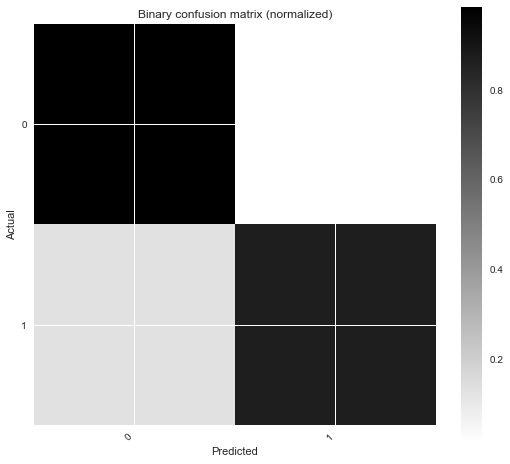

population: 99683
P: 154
N: 99529
PositiveTest: 1619
NegativeTest: 98064
TP: 134
TN: 98044
FP: 1485
FN: 20
TPR: 0.87012987013
TNR: 0.985079725507
PPV: 0.08276714021
NPV: 0.999796051558
FPR: 0.0149202744929
FDR: 0.91723285979
FNR: 0.12987012987
ACC: 0.984902139783
F1_score: 0.151156232375
MCC: 0.265723227902
informedness: 0.855209595637
markedness: 0.0825631917682
prevalence: 0.00154489732452
LRP: 58.3186234641
LRN: 0.131837176735
DOR: 442.353400673
FOR: 0.000203948441834


In [16]:
y_predicted1 = np.array(logistic.predict(X_test))
y_right1 = np.array(y_test)

confusion_matrix1 = ConfusionMatrix(y_right1, y_predicted1)
print("Confusion matrix:\n%s" % confusion_matrix1)
confusion_matrix1.plot(normalized=True)
plt.show()
confusion_matrix1.print_stats()

In [17]:
print("FNR is {0}".format(confusion_matrix1.stats()['FNR']))

FNR is 0.12987012987012986


# Logistic Regression with balanced class weights

In [19]:
best_c, best_fnr = 1, 1
for _ in range(20):
    c = random.uniform(1, 10000)
    logistic = linear_model.LogisticRegression(C=c, class_weight="balanced")
    logistic.fit(X_train, y_train)
    #print("Score: ", logistic.score(X_test, y_test))
    y_predicted2 = np.array(logistic.predict(X_test))
    y_right2 = np.array(y_test)
    confusion_matrix2 = ConfusionMatrix(y_right2, y_predicted2)
    #print("Confusion matrix:\n%s" % confusion_matrix2)
    #confusion_matrix2.plot(normalized=True)
    #plt.show()
    #confusion_matrix2.print_stats()
    fnr = confusion_matrix2.stats()['FNR']
    if fnr < best_fnr:
        best_fnr = fnr
        best_c = c
print("Best C is {0} with best FNR of {1}.".format(best_c, best_fnr))

Best C is 5315.534060359721 with best FNR of 0.09740259740259741.
